# Life Expectancy and GDP correlation

For this project, data on GDP and life expectancy from the World Health Organization 
and the World Bank were analyzed to identify the relationship between the GDP and life expectancy of six sampled countries.

During this project, was analyzed, prepared, and ploted data in order to answer next questions in a meaningful way:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_data = pd.read_csv("all_data.csv")
print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


* Has life expectancy increased over time in the six sampled nations?

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


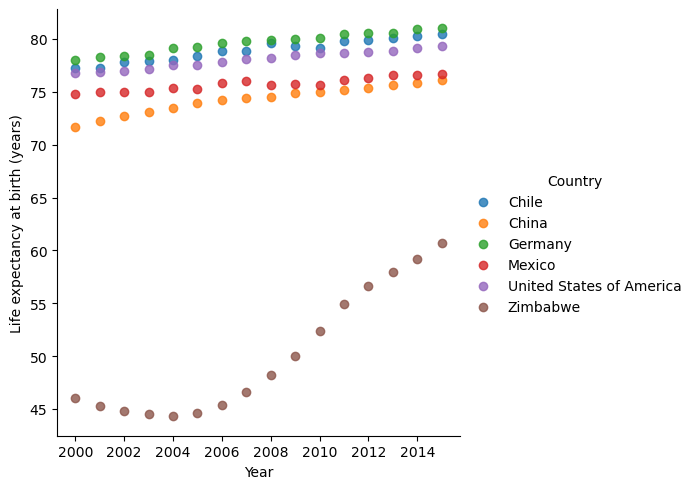

<Figure size 640x480 with 0 Axes>

In [2]:
sns.lmplot(x = 'Year', y = 'Life expectancy at birth (years)', data = all_data, fit_reg = False, hue = 'Country')
plt.show()
plt.clf()

* Has GDP increased over time in the six sampled nations?

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


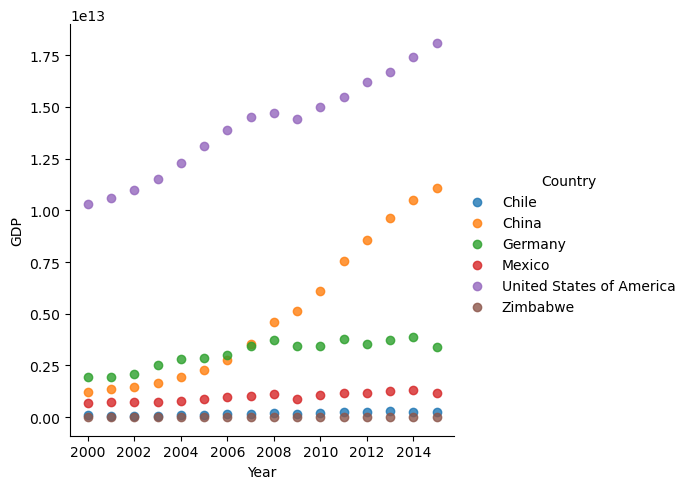

<Figure size 640x480 with 0 Axes>

In [3]:
sns.lmplot(x = 'Year', y = 'GDP', data = all_data, fit_reg = False, hue = 'Country')
plt.show()
plt.clf()

* Is there a correlation between GDP and life expectancy of a country?

In [4]:
mean_data = all_data.groupby('Country').mean().reset_index()
print(mean_data)

                    Country    Year  Life expectancy at birth (years)  \
0                     Chile  2007.5                          78.94375   
1                     China  2007.5                          74.26250   
2                   Germany  2007.5                          79.65625   
3                    Mexico  2007.5                          75.71875   
4  United States of America  2007.5                          78.06250   
5                  Zimbabwe  2007.5                          50.09375   

            GDP  
0  1.697888e+11  
1  4.957714e+12  
2  3.094776e+12  
3  9.766506e+11  
4  1.407500e+13  
5  9.062580e+09  


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


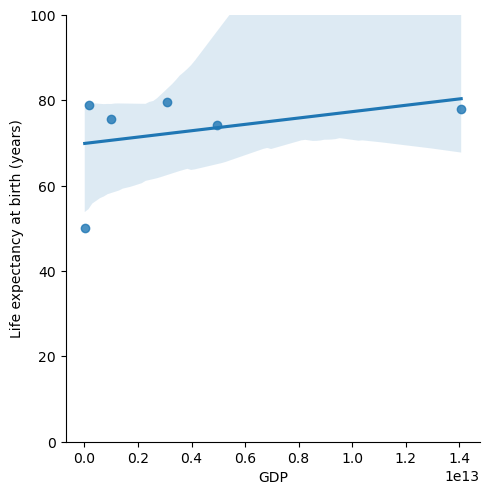

<Figure size 640x480 with 0 Axes>

In [5]:
sns.lmplot(y = 'Life expectancy at birth (years)', x = 'GDP', data = mean_data)
plt.ylim(0, 100)
plt.show()
plt.clf()

* What is the average life expectancy in these nations?

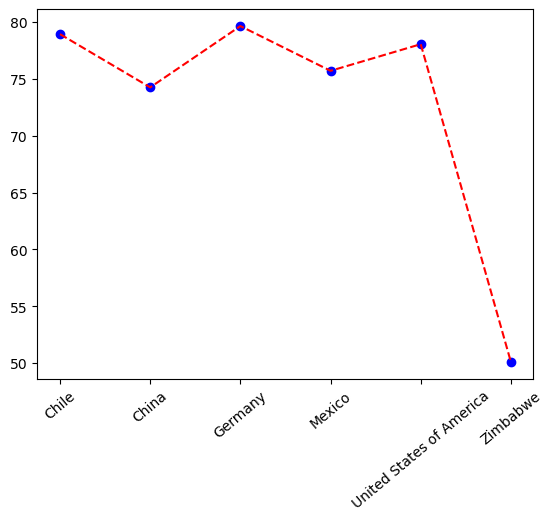

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(
  np.arange(len(mean_data['Country'])), mean_data['Life expectancy at birth (years)'], 'bo', 
  np.arange(len(mean_data['Country'])), mean_data['Life expectancy at birth (years)'], 'r--'
  )
plt.xticks(np.arange(len(mean_data['Country'])), mean_data['Country'], rotation=40)
plt.show()
plt.clf()